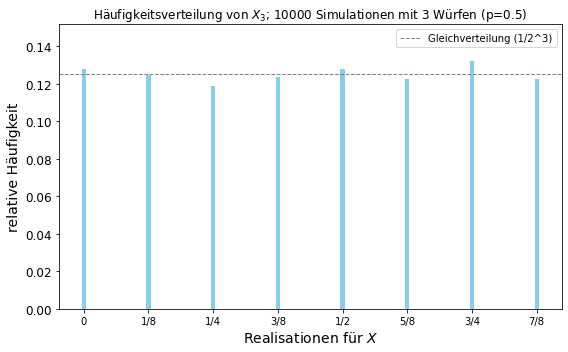

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction

def simulate_sequence_values(num_flips, probability, num_trials):
    """
    Simuliert mehrere Sequenzen von Münzwürfen und berechnet die Werte der Sequenzen.
    
    Args:
    - num_flips: Anzahl der Würfe pro Sequenz.
    - probability: Wahrscheinlichkeit für einen Treffer (z.B. 0.5 für eine faire Münze).
    - num_trials: Anzahl der zu simulierenden Sequenzen.
    
    Returns:
    - Array der berechneten Werte für jede Sequenz.
    """
    # Simuliere die Treffer (1) und Nicht-Treffer (0) für jede Sequenz
    flips = np.random.binomial(1, probability, (num_trials, num_flips))
    
    # Berechne den Wert jeder Sequenz
    values = np.sum(flips * (1 / 2) ** np.arange(1, num_flips + 1), axis=1)
    return values

def plot_sequence_value_distribution(num_flips, probability, num_trials, 
                                     save_as_png=False, figsize=(10, 6)):
    """
    Plottet die Verteilung der Sequenzwerte als Histogramm mit relativen Häufigkeiten.
    
    Args:
    - num_flips: Anzahl der Würfe pro Sequenz.
    - probability: Wahrscheinlichkeit für einen Treffer.
    - num_trials: Anzahl der zu simulierenden Sequenzen.
    - save_as_png: Bool, ob das Bild als PNG gespeichert werden soll.
    - figsize: Größe des Bildes im Format (Breite, Höhe).
    """
    # Simuliere die Werte der Sequenzen
    sequence_values = simulate_sequence_values(num_flips, probability, num_trials)
    
    # Berechne die einzigartigen Werte und ihre Häufigkeiten
    unique_values, counts = np.unique(sequence_values, return_counts=True)
    relative_frequencies = counts / num_trials  # Umrechnung in relative Häufigkeiten
    
    # Berechne den Wert der Gleichverteilung
    uniform_value = 1 / (2 ** num_flips)
    
    # Erstelle das Histogramm für die diskreten Werte
    plt.figure(figsize=figsize)
    plt.bar(unique_values, relative_frequencies, width=0.008, color='skyblue')
    plt.axhline(y=uniform_value, color='gray', linestyle='--',
                linewidth=1, label=f"Gleichverteilung (1/2^{num_flips})")
    plt.xlabel("Realisationen für $X$",fontsize=14)
    plt.ylabel("relative Häufigkeit",fontsize=14)
    plt.title(f"Häufigkeitsverteilung von $X_{num_flips}$;"
              f" {num_trials} Simulationen mit {num_flips} Würfen (p={probability})")
    
    # Bruchdarstellung auf der x-Achse für n < 5, Dezimalwerte für n > 5
    if num_flips < 5:
        x_labels = [Fraction(value).limit_denominator() for value in unique_values]
        # Anzeige der Brüche als Strings
        plt.xticks(unique_values, [str(f) for f in x_labels])  
    else:
        plt.xticks(np.linspace(0, 1, 11),fontsize=14)
    
    # Legende hinzufügen
    plt.legend()

    # Bild speichern, falls gewünscht
    if save_as_png:
        plt.savefig("Häufigkeitsverteilung.png", format="png", dpi=300)
    
    # Zeige das Diagramm
    plt.yticks(fontsize=12)
    max_relative_frequency = max(relative_frequencies)
    plt.ylim(ymax=1.15 * max_relative_frequency)  
    plt.tight_layout()
    plt.show()

# Parameter für die Simulation
num_flips = 3          # Anzahl der Würfe pro Spiel
probability = 0.5      # Wahrscheinlichkeit für einen Treffer (Kopf)
num_trials = 10000     # Anzahl der Simulationen
save_as_png = True     # Speichert das Diagramm als PNG
figsize = (8, 5)       # Größe des Bildes (Breite, Höhe)

# Simulation ausführen und Verteilung der Werte plotten
plot_sequence_value_distribution(num_flips, probability, 
                                 num_trials, save_as_png=save_as_png, 
                                 figsize=figsize)